# I- CNN From Scratch

## 1

#Bibliothèques

In [ ]:
# ➡️ Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# ➡️ Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ➡️ Manipulation de données
import numpy as np

# ➡️ Évaluation du modèle
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
from zipfile import ZipFile

# Remplacer par le chemin correct si besoin
zip_path = "/content/archive.zip"

# Décompression
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/fer2013')

print("Décompression terminée ✅")


Décompression terminée ✅


## 2

In [ ]:

# Transformations avec conversion en niveau de gris

transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#Data Augmentation + plus gros modèle

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# Charger les datasets
train_dataset = ImageFolder(root='/content/fer2013/train', transform=transform_train)
test_dataset = ImageFolder(root='/content/fer2013/test', transform=transform_test)

# DataLoaders
#batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

print("Chargement terminé ✅")


Chargement terminé ✅


## 3

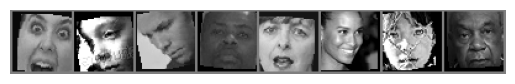

Labels: ['happy', 'sad', 'fear', 'neutral', 'fear', 'happy', 'sad', 'neutral']


In [ ]:

# Fonction pour "dénormaliser" les images (les remettre visibles correctement)
def imshow(img):
    img = img / 2 + 0.5  # dénormaliser
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")
    plt.axis('off')
    plt.show()

# Prendre un batch d'images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Montrer les images
imshow(torchvision.utils.make_grid(images[:8]))  # On affiche 8 images
print('Labels:', [train_dataset.classes[label] for label in labels[:8]])


**Prend 1 batch du train_loader**,

Affiche les 8 premières images côte à côte,

**Montre les labels correspondants (ex: angry, happy, sad...)**.

## 4

In [ ]:


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 12 * 12, 128),  # car après 2 maxpool 48x48 devient 12x12
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 7)  # 7 classes d'émotions
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc_layer(x)
        return x


2 couches convolution ➔ (32 filtres puis 64 filtres)

ReLU après chaque convolution

MaxPooling pour réduire la taille (2x fois)

2 couches Fully Connected (dont 1 finale pour les 7 classes)

Dropout pour éviter l'overfitting (très classique)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()  # car classification multiclasse
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("Modèle prêt ✅")


Modèle prêt ✅


## 5

In [7]:
num_epochs = 35  # tu peux changer selon ton temps/GPU
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # très important de mettre en mode entraînement

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # reset des gradients
        outputs = model(inputs)  # passage dans le modèle
        loss = criterion(outputs, labels)  # calcul de la loss
        loss.backward()  # calcul du gradient
        optimizer.step()  # mise à jour des poids

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("✅ Entraînement terminé !")


Epoch [1/35], Loss: 1.7800
Epoch [2/35], Loss: 1.6892
Epoch [3/35], Loss: 1.6071
Epoch [4/35], Loss: 1.5586
Epoch [5/35], Loss: 1.5214
Epoch [6/35], Loss: 1.4945
Epoch [7/35], Loss: 1.4784
Epoch [8/35], Loss: 1.4646
Epoch [9/35], Loss: 1.4573
Epoch [10/35], Loss: 1.4334
Epoch [11/35], Loss: 1.4234
Epoch [12/35], Loss: 1.4197
Epoch [13/35], Loss: 1.4091
Epoch [14/35], Loss: 1.4025
Epoch [15/35], Loss: 1.3903
Epoch [16/35], Loss: 1.3885
Epoch [17/35], Loss: 1.3798
Epoch [18/35], Loss: 1.3772
Epoch [19/35], Loss: 1.3680
Epoch [20/35], Loss: 1.3682
Epoch [21/35], Loss: 1.3679
Epoch [22/35], Loss: 1.3593
Epoch [23/35], Loss: 1.3601
Epoch [24/35], Loss: 1.3546
Epoch [25/35], Loss: 1.3511
Epoch [26/35], Loss: 1.3435
Epoch [27/35], Loss: 1.3365
Epoch [28/35], Loss: 1.3403
Epoch [29/35], Loss: 1.3377
Epoch [30/35], Loss: 1.3376
Epoch [31/35], Loss: 1.3355
Epoch [32/35], Loss: 1.3231
Epoch [33/35], Loss: 1.3218
Epoch [34/35], Loss: 1.3223
Epoch [35/35], Loss: 1.3213
✅ Entraînement terminé !


## TESTER

In [8]:
model.eval()  # très important de mettre le modèle en mode évaluation

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Accuracy sur le set de test: {accuracy:.2f}%")


✅ Accuracy sur le set de test: 54.64%


# II - Fine-tuner --- Transfer Learning avec ResNet18

On prend un gros modèle (ex: ResNet18) qui a déjà appris sur des millions d’images,

On adapte ce modèle à notre dataset (FER2013 ➔ 7 classes émotions),

Résultat : meilleures performances, moins d'entraînement nécessaire !

In [9]:
import torchvision.models as models

# Charger un ResNet18 pré-entraîné
resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modifier la première couche pour passer d'images RGB (3 canaux) à 1 canal (grayscale)
resnet18.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Adapter la dernière couche pour 7 émotions
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 7)

# Envoyer sur le GPU si disponible
resnet18 = resnet18.to(device)

print("✅ ResNet18 chargé et adapté.")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 117MB/s]


✅ ResNet18 chargé et adapté.


Étape	Détail
1	Charger un ResNet18 pré-entraîné
2	Modifier la dernière couche pour avoir 7 sorties
3	Fine-tuner : entraîner quelques couches finales
4	Entraîner + Tester + Sauvegarder

In [10]:
# Définir perte + optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.0001)
#(On utilise un learning rate plus petit que ton petit CNN, car c’est du fine-tuning.)

In [11]:
#Entrainement

In [12]:
num_epochs = 30
train_losses_resnet = []

for epoch in range(num_epochs):
    running_loss = 0.0
    resnet18.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses_resnet.append(epoch_loss)

    print(f"[ResNet18] Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("✅ Fine-tuning terminé !")

[ResNet18] Epoch [1/30], Loss: 1.8311
[ResNet18] Epoch [2/30], Loss: 1.6246
[ResNet18] Epoch [3/30], Loss: 1.5208
[ResNet18] Epoch [4/30], Loss: 1.4504
[ResNet18] Epoch [5/30], Loss: 1.3982
[ResNet18] Epoch [6/30], Loss: 1.3496
[ResNet18] Epoch [7/30], Loss: 1.3054
[ResNet18] Epoch [8/30], Loss: 1.2676
[ResNet18] Epoch [9/30], Loss: 1.2339
[ResNet18] Epoch [10/30], Loss: 1.1947
[ResNet18] Epoch [11/30], Loss: 1.1629
[ResNet18] Epoch [12/30], Loss: 1.1372
[ResNet18] Epoch [13/30], Loss: 1.1037
[ResNet18] Epoch [14/30], Loss: 1.0826
[ResNet18] Epoch [15/30], Loss: 1.0612
[ResNet18] Epoch [16/30], Loss: 1.0203
[ResNet18] Epoch [17/30], Loss: 0.9933
[ResNet18] Epoch [18/30], Loss: 0.9656
[ResNet18] Epoch [19/30], Loss: 0.9411
[ResNet18] Epoch [20/30], Loss: 0.9100
[ResNet18] Epoch [21/30], Loss: 0.8728
[ResNet18] Epoch [22/30], Loss: 0.8471
[ResNet18] Epoch [23/30], Loss: 0.8067
[ResNet18] Epoch [24/30], Loss: 0.7821
[ResNet18] Epoch [25/30], Loss: 0.7398
[ResNet18] Epoch [26/30], Loss: 0.

In [13]:
# TESTER

In [14]:
resnet18.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_resnet = 100 * correct / total
print(f"✅ Accuracy ResNet18 sur test set: {accuracy_resnet:.2f}%")


✅ Accuracy ResNet18 sur test set: 60.53%


# III- optimisation des hyperparamètres

In [15]:
num_epochs = 100
#num_epochs = 50
train_losses_resnet = []

from torch.optim.lr_scheduler import StepLR

#scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
scheduler = StepLR(optimizer, step_size=20, gamma=0.5)
# => divise le learning rate par 2 tous les 20 epochs


for epoch in range(num_epochs):
    running_loss = 0.0
    resnet18.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()  # <-- Très important ici après chaque epoch !

    epoch_loss = running_loss / len(train_loader)
    train_losses_resnet.append(epoch_loss)

    print(f"[ResNet18] Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("✅ Fine-tuning terminé !")


[ResNet18] Epoch [1/100], Loss: 0.5566
[ResNet18] Epoch [2/100], Loss: 0.5412
[ResNet18] Epoch [3/100], Loss: 0.5125
[ResNet18] Epoch [4/100], Loss: 0.4795
[ResNet18] Epoch [5/100], Loss: 0.4554
[ResNet18] Epoch [6/100], Loss: 0.4319
[ResNet18] Epoch [7/100], Loss: 0.4189
[ResNet18] Epoch [8/100], Loss: 0.3950
[ResNet18] Epoch [9/100], Loss: 0.3796
[ResNet18] Epoch [10/100], Loss: 0.3520
[ResNet18] Epoch [11/100], Loss: 0.3368
[ResNet18] Epoch [12/100], Loss: 0.3306
[ResNet18] Epoch [13/100], Loss: 0.3168
[ResNet18] Epoch [14/100], Loss: 0.3017
[ResNet18] Epoch [15/100], Loss: 0.2873
[ResNet18] Epoch [16/100], Loss: 0.2771
[ResNet18] Epoch [17/100], Loss: 0.2696
[ResNet18] Epoch [18/100], Loss: 0.2569
[ResNet18] Epoch [19/100], Loss: 0.2384
[ResNet18] Epoch [20/100], Loss: 0.2415
[ResNet18] Epoch [21/100], Loss: 0.1820
[ResNet18] Epoch [22/100], Loss: 0.1517
[ResNet18] Epoch [23/100], Loss: 0.1471
[ResNet18] Epoch [24/100], Loss: 0.1396
[ResNet18] Epoch [25/100], Loss: 0.1365
[ResNet18

100 epochs ➔ plus d'apprentissage ➔ meilleure généralisation,

StepLR ➔ diminue le learning rate au fur et à mesure ➔ permet au modèle de mieux converger en fin de training.


In [16]:
resnet18.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_resnet = 100 * correct / total
print(f"✅ Accuracy ResNet18 sur test set: {accuracy_resnet:.2f}%")


✅ Accuracy ResNet18 sur test set: 62.69%


In [17]:
torch.save(resnet18.state_dict(), 'resnet18_fer2013.pth')

# IV - Évaluation complète du modèle

In [18]:
# 🧠 Mode évaluation
resnet18.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


✅ Accuracy sur test set : 62.69%
📄 Classification Report :
              precision    recall  f1-score   support

       angry       0.55      0.53      0.54       958
     disgust       0.80      0.65      0.72       111
        fear       0.52      0.47      0.49      1024
       happy       0.78      0.82      0.80      1774
     neutral       0.54      0.60      0.57      1233
         sad       0.51      0.48      0.50      1247
    surprise       0.78      0.77      0.77       831

    accuracy                           0.63      7178
   macro avg       0.64      0.62      0.63      7178
weighted avg       0.62      0.63      0.63      7178



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


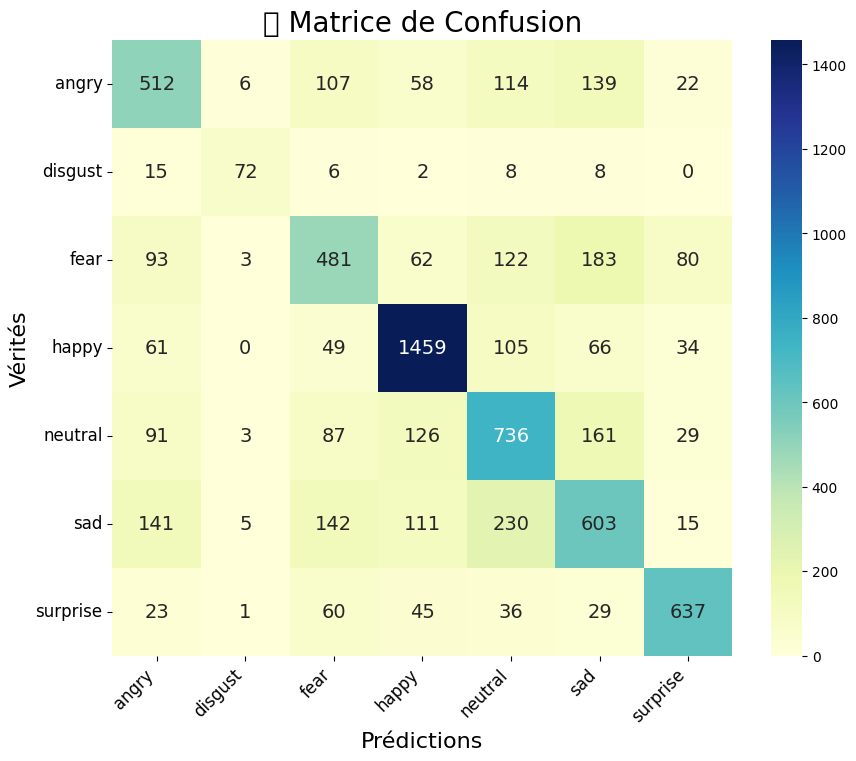

In [ ]:


# ➡️ Définir les classes (corrige ton erreur)
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ➡️ Calcul de l'accuracy globale
accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"✅ Accuracy sur test set : {accuracy*100:.2f}%")


# ➡️ Classification report (precision, recall, f1-score)
report = classification_report(all_labels, all_preds, target_names=classes)
print("📄 Classification Report :")
print(report)

# ➡️ Affichage stylé de la Matrice de Confusion
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            xticklabels=classes, yticklabels=classes,
            annot_kws={"size": 14})  # Chiffres plus gros
plt.title('💥 Matrice de Confusion', fontsize=20)
plt.xlabel('Prédictions', fontsize=16)
plt.ylabel('Vérités', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# ➡️ Sauvegarder pour Streamlit
np.save("confusion_matrix.npy", cm)
np.save("model_accuracy.npy", np.array([accuracy]))

with open("classification_report.txt", "w") as f:
    f.write(report)
